<a href="https://colab.research.google.com/github/PavelStelmakhV/hw311-keras-conv-fasion-mnist/blob/main/hw311_keras_conv_fasion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
# import numpy as np
import matplotlib.pyplot as plt
# import tf_keras

from keras import layers
from keras import models
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# from keras import regularizers
from keras import callbacks
# from keras import initializers
# from keras.layers import BatchNormalization
from keras.models import load_model

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# create validation data
# val_size = 6600

# x_val = x_train[-val_size:, :, :]
# x_train = x_train[:-val_size, :, :]

# y_val = y_train[-val_size:]
# y_train = y_train[:-val_size]

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
# x_val = x_val.astype('float32') / 255

y_train = to_categorical(y_train, num_classes=10, dtype='float32')
y_test = to_categorical(y_test, num_classes=10, dtype='float32')
# y_val = to_categorical(y_val)

In [5]:
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# train_images = train_images.reshape((60000, 28, 28, 1))
# train_images = train_images.astype("float32") / 255
# test_images = test_images.reshape((10000, 28, 28, 1))
# test_images = test_images.astype("float32") / 255
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

In [10]:
model = models.Sequential([
    layers.Conv2D(32, (5, 5), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),

    layers.Conv2D(64, (5, 5), activation="relu", padding="same"),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),

    # layers.Conv2D(64, (3, 3), activation="relu"),

    layers.Flatten(),
    layers.Dense(1024, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

In [11]:
es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=5)
mc = callbacks.ModelCheckpoint('best_model.h5', monitor='categorical_accuracy', mode='max', verbose=0, save_best_only=True)

In [12]:
model.compile(optimizer="nadam",
              loss="categorical_crossentropy",
              metrics=["categorical_accuracy"]
              )
history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=128,
                    verbose=1,
                    callbacks=[mc, es],
                    validation_split=0.1
                    )

Epoch 1/15
422/422 [==============================] - 112s 262ms/step - loss: 0.4762 - categorical_accuracy: 0.8267 - val_loss: 0.3264 - val_categorical_accuracy: 0.8792
Epoch 2/15


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


422/422 [==============================] - 110s 262ms/step - loss: 0.2962 - categorical_accuracy: 0.8927 - val_loss: 0.2835 - val_categorical_accuracy: 0.8968
Epoch 3/15
422/422 [==============================] - 110s 261ms/step - loss: 0.2530 - categorical_accuracy: 0.9079 - val_loss: 0.2487 - val_categorical_accuracy: 0.9080
Epoch 4/15
422/422 [==============================] - 109s 259ms/step - loss: 0.2234 - categorical_accuracy: 0.9177 - val_loss: 0.2384 - val_categorical_accuracy: 0.9112
Epoch 5/15
422/422 [==============================] - 109s 259ms/step - loss: 0.2001 - categorical_accuracy: 0.9260 - val_loss: 0.2266 - val_categorical_accuracy: 0.9153
Epoch 6/15
422/422 [==============================] - 109s 259ms/step - loss: 0.1799 - categorical_accuracy: 0.9337 - val_loss: 0.2406 - val_categorical_accuracy: 0.9123
Epoch 7/15
422/422 [==============================] - 110s 261ms/step - loss: 0.1629 - categorical_accuracy: 0.9402 - val_loss: 0.2175 - val_categorical_accuracy

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 6s 18ms/step - loss: 0.2898 - categorical_accuracy: 0.9180

Test accuracy: 0.9179999828338623


In [14]:
result = model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 21ms/step - loss: 0.2898 - categorical_accuracy: 0.9180


In [15]:
saved_model = load_model('best_model.h5')
result = saved_model.evaluate(x_test, y_test)
print(result)

313/313 [==============================] - 6s 18ms/step - loss: 0.2898 - categorical_accuracy: 0.9180
[0.2898312509059906, 0.9179999828338623]


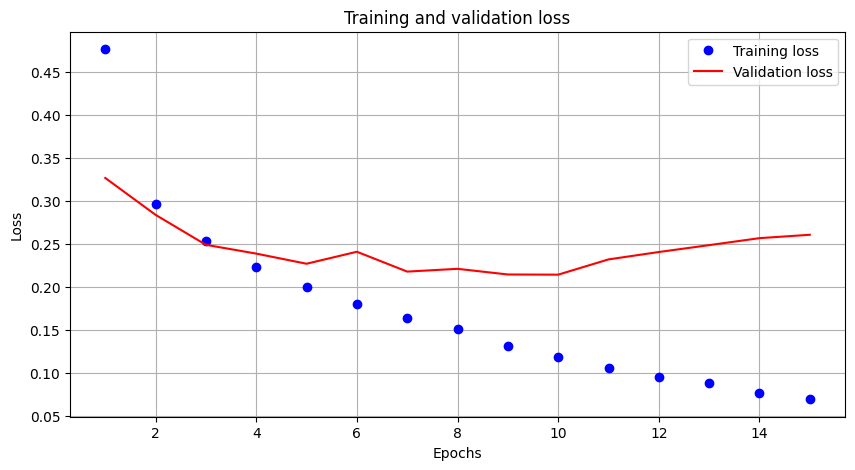

<Figure size 640x480 with 0 Axes>

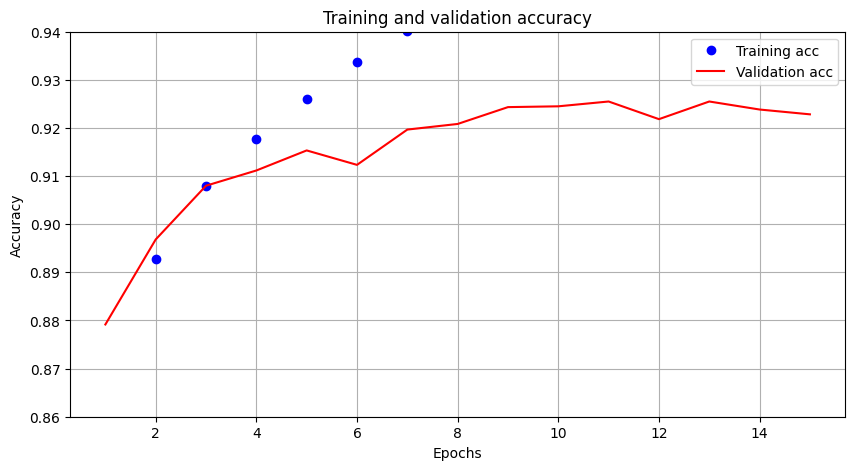

In [16]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
# plt.ylim (0.2, 0.5)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
1
plt.clf()
plt.figure(figsize=(10, 5))
val_acc_values = history_dict['categorical_accuracy']
plt.plot(epochs, history_dict['categorical_accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_categorical_accuracy'], 'r', label='Validation acc')
plt.ylim (0.86, 0.94)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 1024)              2